# ICAN clinical data simualtion 

**Objective:** sharing synthetic data in the context of the INEX-MED project to start working on interoperability issues while a data sharing agreement is being written/signed between partners. 

In this notebook, we generate random values with probability distribtions close to the real ICAN dataset. 

In [1]:
import pandas as pd
import numpy as np
import uuid
from datetime import datetime
from dateutil.relativedelta import relativedelta
import missingno as msno

In [2]:
FEATURES = ['sexe', 'date de naissance', 'imc', 'cas sporadique', 'N°ADN IRT 1', 
 "ATCD familial d'AIC (1er degré)", 'circonstances de decouverte', 
 'statut phenotypique', 'nb d anevrismes', 'AIC 1 Grand axe mm', 
 'AIC 1 Localisation', 'ATCD AVC ischemique', 'ATCD Cardiopathie ischemique', 
            'ATCD AOMI', 'ATCD Stenose carotidienne', 'consommation de tabac O/N',
 'quantite alcool par semaine (g)', 'total semaine',
 'hypertension arterielle' ,'cephalees', 'diabete', 'dyslipidemie',
 'ttt Statine', 'ttt Anti agreg plaquettaire', 'ttt AVK ou anticoag',
 'ttt Anti inflammatoire', 'ttt Hormones de substitution'] 

In [3]:
df = pd.DataFrame()
nb_samples = 3000

df['inclusion_id'] = [ "AIC_"+str(i) for i in range(0, nb_samples)]

for f in FEATURES :
    
    if 'sexe' in f:
        df[f] = np.random.choice(['M', 'F', '0', ''], nb_samples, p=[0.29, 0.65, 0.01, 0.05])
    
    if 'date de naissance' in f:
        days = np.random.randint(1,31, size=nb_samples)
        months = np.random.randint(1,12, size=nb_samples)
        years = np.random.randint(0,99, size=nb_samples)
        dates = [ str(days[i])+"/"+str(months[i])+"/"+str(years[i]) for i in range(0, nb_samples)]
        missing_rate = 0.05
        tbrm = np.random.choice(nb_samples, int(np.ceil(missing_rate*nb_samples)), replace=False)
        for i in tbrm :
            dates[i] = ''
        df[f] = dates
        
    if 'cas sporadique' in f:
        df[f] = np.random.choice(['Oui', 'Non', 'NP', ''], nb_samples, p=[0.7, 0.20, 0.03, 0.07])

    if 'ADN' in f:
        dna = [ "CD156"+str(i) for i in range(0, nb_samples)]
        missing_rate = 0.3
        tbrm = np.random.choice(nb_samples, int(np.ceil(missing_rate*nb_samples)), replace=False)
        for i in tbrm :
            dna[i] = ''
        df[f] = dna
    
    if 'circonstance' in f:
        df[f] = np.random.choice(['Compressif ou ischémique', 'Dépistage familial', 'Fortuite', 'Rupture AIC', ''], nb_samples, p=[0.02, 0.04, 0.37, 0.29, 0.28])
    
    if 'ATCD' in f:
        df[f] = np.random.choice(['Non', 'NP', 'Oui certain', 'Oui non confirmé', ''], nb_samples, p=[0.56, 0.01, 0.13, 0.01, 0.29])
    
    if 'phenotyp' in f:
        df[f] = np.random.choice(['certain', 'incertain', 'NP', "pas d'anévrisme", 'Sain', ''], nb_samples, p=[0.729, 0.008, 0.001, 0.101, 0.002, 0.159])
    
    if 'nb d anevrismes' in f:
        df[f] = np.random.choice(['0', '1', '2', '3', '4', '5', '6', ''], nb_samples, 
                                 p=[0.098, 0.501, 0.145, 0.056, 0.022, 0.006, 0.004, 0.168])
    
    if 'ttt' in f:
        df[f] = np.random.choice(['Non', 'NP', 'Oui', ''], nb_samples, 
                                 p=[0.799, 0.003, 0.036, 0.162])
    
    if 'Grand axe mm' in f:
        df[f] = np.random.choice(['2', '5', '10', '20', ''], nb_samples, 
                                 p=[0.05, 0.1, 0.4, 0.05, 0.4])
    
    if 'Localisation' in f:
        df[f] = np.random.choice(['18', '10', '118', '105', '11', '6', ''], nb_samples, 
                                 p=[0.3, 0.15, 0.15, 0.04, 0.03, 0.03 ,0.3])
    
    if ('hypertension' in f) or ('cephalees' in f) or ('diabete' in f) or ('dyslipidemie' in f):
        df[f] = np.random.choice(['Oui', 'Non', 'NP', ''], nb_samples, 
                                 p=[0.1, 0.4, 0.1, 0.4])
    
    if 'alcool' in f:
        df[f] = np.random.choice(['0', '', '200', '50'], nb_samples, 
                                 p=[0.15, 0.2, 0.05, 0.6])
    
    if 'consommation de tabac' in f:
        df[f] = np.random.choice(['jamais fumé', 'sevrage > 3', 'sevrage < 3', 'tabagisme actif', ''], nb_samples, 
                                 p=[0.27, 0.16, 0.11, 0.30,0.16])
    
    if 'imc' in f:
        #df[f] = np.random.normal(20, 5, nb_samples)
        df[f] = np.random.choice(['12', '20', '26', '30', ''], nb_samples, 
                                 p=[0.2, 0.4, 0.2, 0.1,0.1])
        
        
df
    

,inclusion_id,sexe,date de naissance,imc,cas sporadique,N°ADN IRT 1,ATCD familial d'AIC (1er degré),circonstances de decouverte,statut phenotypique,nb d anevrismes,...,quantite alcool par semaine (g),hypertension arterielle,cephalees,diabete,dyslipidemie,ttt Statine,ttt Anti agreg plaquettaire,ttt AVK ou anticoag,ttt Anti inflammatoire,ttt Hormones de substitution
0,AIC_0,F,17/5/55,26,Oui,CD1560,Non,,certain,0,...,50,Non,Non,Non,,Non,Non,Non,Non,Non
1,AIC_1,F,21/6/16,30,Oui,,Non,Fortuite,certain,2,...,,,,,,Non,Non,Non,Non,Non
2,AIC_2,F,1/4/92,12,Oui,CD1562,Oui certain,Rupture AIC,,1,...,50,Non,,Non,Non,,,Non,Non,Non
3,AIC_3,F,20/4/95,,Oui,,Oui non confirmé,Rupture AIC,certain,1,...,,,Non,,,,Non,Non,Non,Non
4,AIC_4,F,1/4/4,12,Oui,CD1564,Non,Fortuite,,1,...,200,Non,,Non,Non,Non,Non,Non,Non,Oui
5,AIC_5,M,14/9/37,26,Oui,CD1565,,Rupture AIC,,,...,50,Non,NP,,Non,,Non,,Non,Non
6,AIC_6,0,28/6/6,12,Oui,CD1566,Non,Fortuite,certain,1,...,0,Non,Non,NP,Oui,Non,Non,Non,Non,Non
7,AIC_7,M,8/1/8,,Oui,CD1567,Non,Rupture AIC,certain,0,...,50,,,Non,,Non,Non,Non,Non,Non
8,AIC_8,F,22/8/87,20,Oui,CD1568,Oui certain,Dépistage familial,certain,2,...,50,Non,Non,Non,NP,Non,Non,Non,Non,Non
9,AIC_9,M,5/9/42,20,Non,,,Fortuite,certain,2,...,0,Non,,,,,Non,Non,Non,Non


## Missing values summary

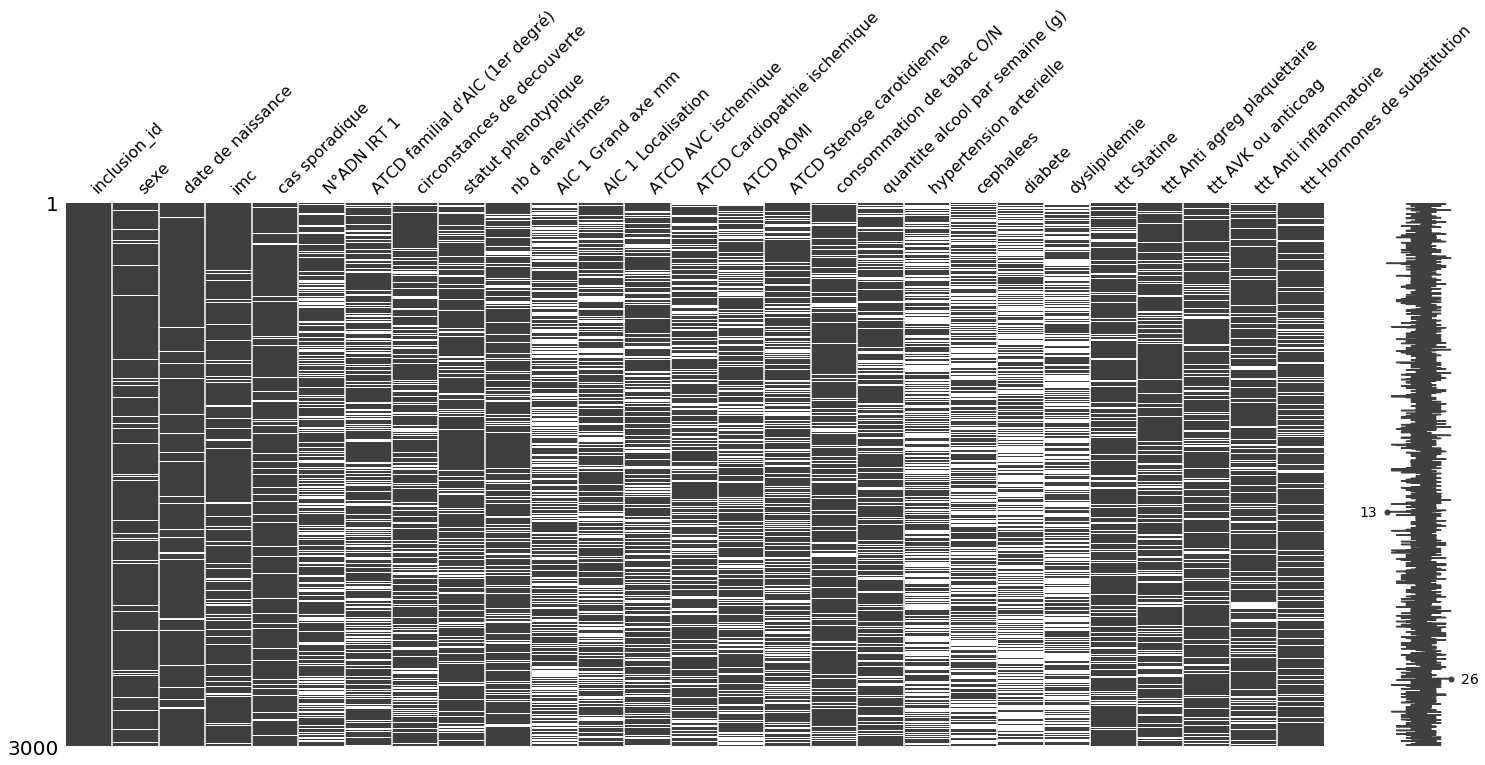

In [4]:
df.replace(['NP', 'np', 'Np', 'nP', ''], np.nan, inplace=True)
msno.matrix(df)

## Export to a tabular CSV file

In [5]:
df.to_csv('simulated_ican_clinical_data.csv', encoding='utf8')   